# Training Stripes

In [5]:
import h5py, math, os
import numpy as np
from matplotlib import pyplot as plt

In [10]:
save_dir = "/home/brian/data4/brian/PBnJ/test_data/stripes_padded"
size = (1080, 1080, 1)
label_size = (30, 3)

intensity_scale = 100 
intensity_offset = 1300 
x_scale = 10
y_scale = 100

X,Y = np.mgrid[100:1000:200, 100:1000:200]

X = X.flatten()
Y = Y.flatten()


def pattern_gen(x,y,z):
    x = x/x_scale
    y = y/y_scale
    return (math.sin(x) - y + z) * intensity_scale + intensity_offset


def transform(x,y,z):
    return x + .1 * y, y, z

1399.9998449014295 121.00097934492965


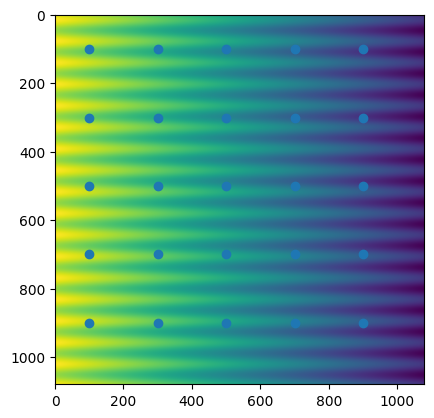

In [7]:
%matplotlib inline
img_fix = np.zeros(size)
for x in range(size[0]):
    for y in range(size[1]):
        for z in range(size[2]):
            img_fix[x,y,z] = pattern_gen(x,y,z)

plt.imshow(img_fix)

print(np.max(img_fix),np.min(img_fix))

plt.scatter(X, Y)
plt.show()

1399.9998449014295 121.00072122935171


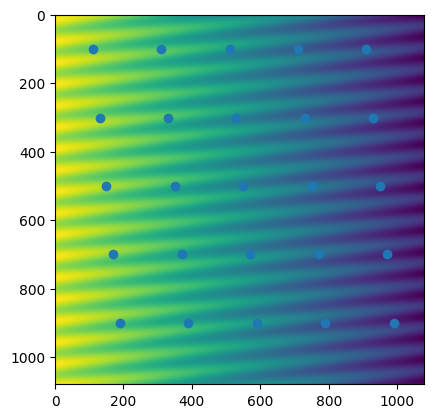

In [8]:
img_mov = np.zeros(size)
for x in range(size[0]):
    for y in range(size[1]):
        for z in range(size[2]):
            xt,yt,zt = transform(x,y,z)
            img_mov[x,y,z] = pattern_gen(xt,yt,zt)

Xt = []
Yt = []
for x, y in zip(X, Y):
    x, y, z = transform(x, y, z)
    Xt.append(x)
    Yt.append(y)

plt.imshow(img_mov)

print(np.max(img_mov),np.min(img_mov))

plt.scatter(Xt, Yt)
plt.show()

In [9]:
with h5py.File(os.path.join(save_dir, "fixed_images.h5"), 'w') as ifix, h5py.File(os.path.join(save_dir, "fixed_labels.h5"), 'w') as lf:
    ifix.create_dataset("1to2", data = img_fix)
    lf.create_dataset("1to2", data = np.pad(np.column_stack((X, Y, np.zeros_like(X))), [[0, label_size[0] - len(X)],[0, 0]], "constant", constant_values=-1))


with h5py.File(os.path.join(save_dir, "moving_images.h5"), 'w') as im, h5py.File(os.path.join(save_dir, "moving_labels.h5"), 'w') as lm:
    im.create_dataset("1to2", data = img_mov)
    lm.create_dataset("1to2", data = np.pad(np.column_stack((Xt, Yt, np.zeros_like(Xt))), [[0, label_size[0] - len(Xt)],[0, 0]], "constant", constant_values=-1))


with h5py.File(os.path.join(save_dir, "moving_rois.h5"), 'w') as mr, h5py.File(os.path.join(save_dir, "fixed_rois.h5"), 'w') as fr:
    fr.create_dataset("1to2", data = np.zeros_like(img_mov))
    mr.create_dataset("1to2", data = np.zeros_like(img_mov))

Same as above but pads the image with zeros

In [12]:
padding = np.array([[0,0],[0,0],[1,0]])

labs = np.column_stack((X, Y, np.zeros_like(X))) + padding[:, 0]
labsT = np.column_stack((Xt, Yt, np.zeros_like(Xt))) + padding[:, 0]

with h5py.File(os.path.join(save_dir, "fixed_images.h5"), 'w') as ifix, h5py.File(os.path.join(save_dir, "fixed_labels.h5"), 'w') as lf:
    ifix.create_dataset("1to2", data = np.pad(img_fix, padding, "constant", constant_values=0))
    lf.create_dataset("1to2", data = np.pad(labs, [[0, label_size[0] - len(X)],[0, 0]], "constant", constant_values=-1))


with h5py.File(os.path.join(save_dir, "moving_images.h5"), 'w') as im, h5py.File(os.path.join(save_dir, "moving_labels.h5"), 'w') as lm:
    im.create_dataset("1to2", data = np.pad(img_mov, padding, "constant", constant_values=0))
    lm.create_dataset("1to2", data = np.pad(labsT, [[0, label_size[0] - len(Xt)],[0, 0]], "constant", constant_values=-1))

with h5py.File(os.path.join(save_dir, "moving_rois.h5"), 'w') as mr, h5py.File(os.path.join(save_dir, "fixed_rois.h5"), 'w') as fr:
    fr.create_dataset("1to2", data = np.pad(np.zeros_like(img_mov), padding, "constant", constant_values=0))
    mr.create_dataset("1to2", data = np.pad(np.zeros_like(img_mov), padding, "constant", constant_values=0))
